
#Projeto de Análise de Dados - Venda de Filial Samsung
Como parte do meu desenvolvimento na área de Análise de Dados, estou trabalhando em um projeto que utiliza dados reais da Samsung sobre a venda de uma de suas filiais. O objetivo é explorar abordagens de análise e fornecer insights que possam contribuir para a compreensão do desempenho da filial e orientar decisões estratégicas.

##Contexto do Projeto
A Samsung, uma renomada empresa global, está passando por mudanças em sua estrutura organizacional e decidiu vender uma de suas filiais. Este projeto visa analisar dados relacionados a essa venda, com foco em entender o perfil dos clientes envolvidos, os produtos adquiridos e as categorias dos produtos vendidos.

##Dados Utilizados
Os dados utilizados para esta análise incluem as seguintes colunas:

- NOME_CLIENTE: Nome do cliente envolvido na transação.
- FONE_CLIENTE: Número de telefone fixo do cliente.
- CELULAR_CLIENTE: Número de telefone celular do cliente.
- DESCRIÇÃO: Descrição do produto adquirido durante a venda da filial.
- CATEGORIA: Categoria do produto adquirido.
Essas informações fornecerão insights valiosos sobre os padrões de compra dos clientes durante o processo de venda da filial.

#Metodologia
O projeto seguirá as seguintes etapas:

1. Exploração Inicial dos Dados: Realizar uma análise exploratória inicial para compreender a distribuição dos dados, identificar valores ausentes e outliers.

2. Tratamento de Dados: Aplicar técnicas de limpeza de dados, como preenchimento de valores ausentes e remoção de registros inconsistentes.

3. Análise Descritiva: Realizar uma análise descritiva para extrair informações relevantes sobre os clientes, produtos e categorias envolvidas na venda da filial.

4. Visualizações Gráficas: Criar visualizações gráficas, como gráficos de barras e de dispersão, para representar visualmente padrões e tendências nos dados.

5. Conclusões e Recomendações: Fornecer conclusões baseadas na análise realizada e fazer recomendações para futuras ações estratégicas.

## Acesso aos Dados
Os dados utilizados neste projeto foram obtidos a partir de fontes confiáveis da Samsung, garantindo a privacidade e a confidencialidade das informações. O projeto será conduzido em conformidade com as práticas éticas e legais relacionadas ao uso de dados empresariais.

Vamos agora iniciar cada etapa do projeto detalhadamente no Jupyter Notebook.

### Importando Bibliotecas.


In [202]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

### Importação dos Dados utilizados.


In [203]:
data = '/content/base clientes S20 S21 S22 S23.csv'
df = pd.read_csv(data, encoding='latin1', delimiter=';')

### Etapa 1: Exploração Inicial dos Dados

In [204]:
print("Temos", df.shape[0], "linhas e", df.shape[1], "colunas.")

Temos 17764 linhas e 5 colunas.


In [205]:
# Visualizando Dados.
df.head()

,NOME_CLIENTE,FONE_CLIENTE,CELULAR_CLIENTE,DESCRICAO,CATEGORIA
0,ALLIED TECNOLOGIA S.A.,(55)1155-0399,NaN,GALAXY A31 PRETO,Smartphone
1,ALLIED TECNOLOGIA S.A.,(55)1155-0399,NaN,GALAXY TAB S6 LITE CINZA,Tablet
2,ALLIED TECNOLOGIA S.A.,(55)1155-0399,NaN,GALAXY S20 PLUS 128GB PRETO,Smartphone
3,ALLIED TECNOLOGIA S.A.,(55)1155-0399,NaN,GALAXY WATCH ACTIVE2 BT 44MM (ALUMÍNIO) PRETO...,Wearable
4,ALLIED TECNOLOGIA S.A.,(55)1155-0399,NaN,GALAXY WATCH ACTIVE PRETO (NAC),Wearable


In [206]:
# Informações gerias sobre os dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17764 entries, 0 to 17763
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NOME_CLIENTE     17764 non-null  object
 1   FONE_CLIENTE     17755 non-null  object
 2   CELULAR_CLIENTE  10183 non-null  object
 3   DESCRICAO        17764 non-null  object
 4   CATEGORIA        17764 non-null  object
dtypes: object(5)
memory usage: 694.0+ KB


In [207]:
# Estatísticas descritivas
df.describe()

,NOME_CLIENTE,FONE_CLIENTE,CELULAR_CLIENTE,DESCRICAO,CATEGORIA
count,17764,17755,10183,17764,17764
unique,5720,5635,3570,709,6
top,ALLIED TECNOLOGIA S.A.,(55)1155-0399,(11)99297-6924,VALE-PRESENTE,Smartphone
freq,2872,1502,136,969,7579


In [208]:
# Verificando valores ausentes
df.isnull().sum()

NOME_CLIENTE          0
FONE_CLIENTE          9
CELULAR_CLIENTE    7581
DESCRICAO             0
CATEGORIA             0
dtype: int64

### Etapa 2: Tratamento de Dados


**Removendo linhas com 'ALLIED TECNOLOGIA S.A.'**
*Nosso parceiro informou que os registros relacionados à 'ALLIED TECNOLOGIA S.A.' não são dados de clientes,
portanto, estamos removendo essas linhas do conjunto de dados.*

In [209]:
valor_a_remover = 'ALLIED TECNOLOGIA S.A.'
df.replace(valor_a_remover, pd.NA, inplace=True)

In [210]:
#Verificando se os valores foram removidos.
df['NOME_CLIENTE'].values

array([<NA>, <NA>, <NA>, ..., 'FERNANDO ANTONIO DRUBSKY DE CAMPOS',
       'ALICE COTTA DOURADO', 'ALICE COTTA DOURADO'], dtype=object)

In [211]:
# Removendo linhas com valores nulos.
df = df.dropna(subset=['NOME_CLIENTE'])
df['NOME_CLIENTE'].values

array(['Jarder Fernadino', 'MARCELO FIGUEIREDO',
       'RONALDO GOODSON DO NASCIMENTO', ...,
       'FERNANDO ANTONIO DRUBSKY DE CAMPOS', 'ALICE COTTA DOURADO',
       'ALICE COTTA DOURADO'], dtype=object)

**Removendo coluna CELULAR_CLIENTE e FONE_CLIENTE**


In [212]:
remover = ['CELULAR_CLIENTE', 'FONE_CLIENTE']
df = df.drop(columns = remover)


In [213]:
# Verificando se as colunas foram removidas.
df.head()

,NOME_CLIENTE,DESCRICAO,CATEGORIA
37,Jarder Fernadino,FONE ESTÉREO COM FIO PRETO,Acessório
38,MARCELO FIGUEIREDO,GALAXY TAB A8 4G 2019,Tablet
39,RONALDO GOODSON DO NASCIMENTO,FONE ESTÉREO COM FIO PRETO,Acessório
40,JOAO VICENTE DOS SANTOS NETO,FONE ESTÉREO COM FIO PRETO,Acessório
41,JOSE OTAVIO,CAPA PROTETORA FLIP WALLET GALAXY NOTE 10 LITE...,Acessório


### Etapa 3: Análise Descritiva


In [214]:
descricao_dados = df.describe()
print(descricao_dados)

                 NOME_CLIENTE      DESCRICAO   CATEGORIA
count                   14892          14892       14892
unique                   5719            682           6
top     ALLIED TECNOLOGIA S.A  VALE-PRESENTE  Smartphone
freq                      839            969        6269


In [215]:
df['CATEGORIA'].value_counts()

Smartphone      6269
Acessório       6075
Wearable        1402
Tablet           812
Notebook         328
Linha Marrom       6
Name: CATEGORIA, dtype: int64

In [216]:
df['DESCRICAO'].value_counts()

VALE-PRESENTE                                           969
CARREGADOR DE PAREDE SUPER FAST CHARGING 25W            568
CARREGADOR DE VIAGEM ULTRA RÁPIDO - TIPO C              505
PELICULA FILM LISA - TRANSPARENTE UPMAX                 459
FONE USB TIPO-C COM FIO E CONTROLES - PRETO             455
                                                       ... 
PULSEIRA ESPORTIVA COURO GALAXY WATCH ACTIVE - PRETA      1
S9+ HYPERKNIT COVER - VERMELHO                            1
MOCHILA NOTEBOOK 15.6 KROSS CASUAL CINZA                  1
Galaxy Buds2 Pro Branco                                   1
Galaxy Tab S6 Lite 64GB 4G Cinza                          1
Name: DESCRICAO, Length: 682, dtype: int64

In [217]:
# Análise descritiva da coluna 'DESCRIÇÃO'
descricao_counts = df['DESCRICAO'].value_counts()
print(descricao_counts)

VALE-PRESENTE                                           969
CARREGADOR DE PAREDE SUPER FAST CHARGING 25W            568
CARREGADOR DE VIAGEM ULTRA RÁPIDO - TIPO C              505
PELICULA FILM LISA - TRANSPARENTE UPMAX                 459
FONE USB TIPO-C COM FIO E CONTROLES - PRETO             455
                                                       ... 
PULSEIRA ESPORTIVA COURO GALAXY WATCH ACTIVE - PRETA      1
S9+ HYPERKNIT COVER - VERMELHO                            1
MOCHILA NOTEBOOK 15.6 KROSS CASUAL CINZA                  1
Galaxy Buds2 Pro Branco                                   1
Galaxy Tab S6 Lite 64GB 4G Cinza                          1
Name: DESCRICAO, Length: 682, dtype: int64


In [218]:
# Análise descritiva da coluna 'CATEGORIA'
categoria_counts = df['CATEGORIA'].value_counts()
print(categoria_counts)

Smartphone      6269
Acessório       6075
Wearable        1402
Tablet           812
Notebook         328
Linha Marrom       6
Name: CATEGORIA, dtype: int64


In [219]:
df['CATEGORIA'].values

array(['Acessório', 'Tablet', 'Acessório', ..., 'Smartphone',
       'Smartphone', 'Acessório'], dtype=object)

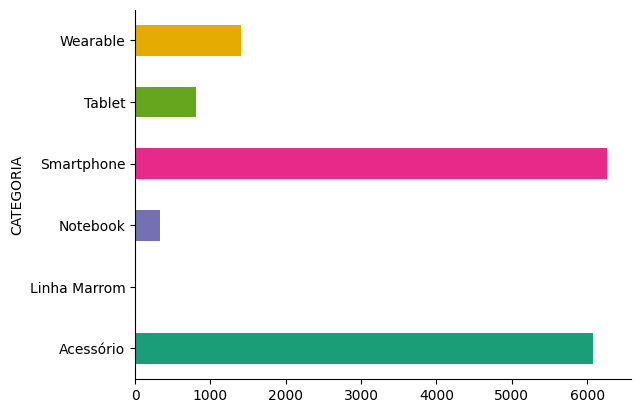

In [220]:
df.groupby('CATEGORIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

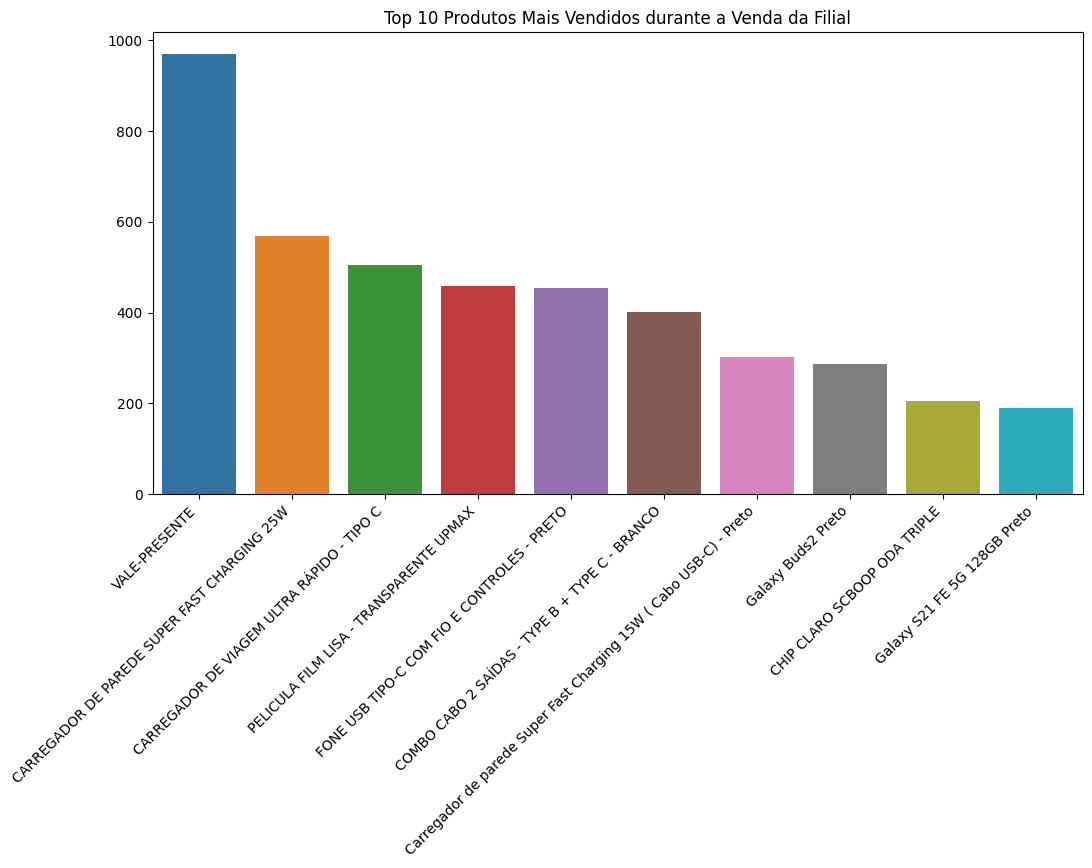

In [221]:
# Gráfico de barras para os top 10 produtos mais vendidos
plt.figure(figsize=(12, 6))
top_produtos_mais_vendidos = df['DESCRICAO'].value_counts().nlargest(10)
sns.barplot(x=top_produtos_mais_vendidos.index, y=top_produtos_mais_vendidos.values)
plt.title('Top 10 Produtos Mais Vendidos durante a Venda da Filial')
plt.xticks(rotation=45, ha='right')
plt.show()

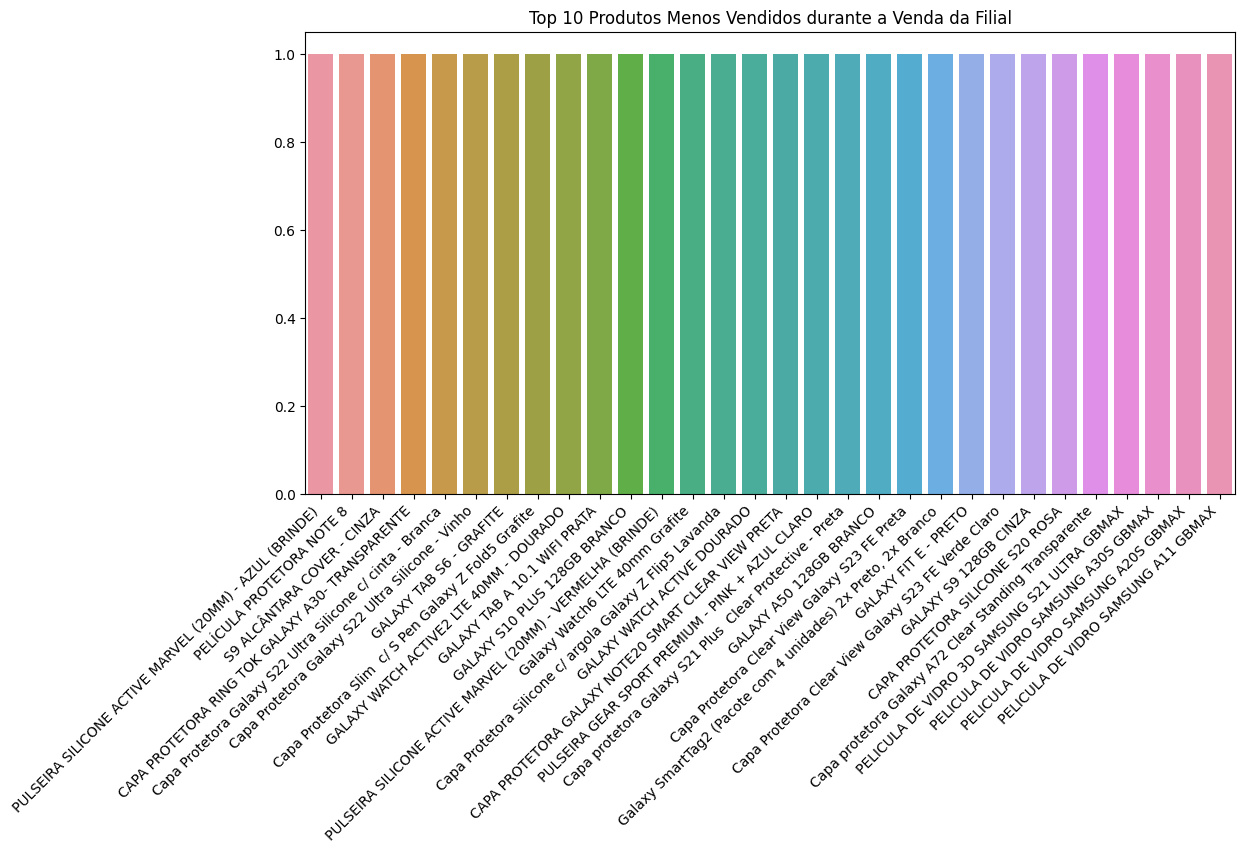

In [222]:
# Gráfico de barras para os top 10 produtos menos vendidos
plt.figure(figsize=(12, 6))
top_produtos_menos_vendidos = df['DESCRICAO'].value_counts().nsmallest(30)
sns.barplot(x=top_produtos_menos_vendidos.index, y=top_produtos_menos_vendidos.values)
plt.title('Top 10 Produtos Menos Vendidos durante a Venda da Filial')
plt.xticks(rotation=45, ha='right')
plt.show()

In [223]:
df['DESCRICAO'].info

<bound method Series.info of 37                              FONE ESTÉREO COM FIO PRETO
38                                   GALAXY TAB A8 4G 2019
39                              FONE ESTÉREO COM FIO PRETO
40                              FONE ESTÉREO COM FIO PRETO
41       CAPA PROTETORA FLIP WALLET GALAXY NOTE 10 LITE...
                               ...                        
17759                        Galaxy Watch6 BT 44mm Grafite
17760                                        VALE-PRESENTE
17761                                        VALE-PRESENTE
17762                        Galaxy Z Fold5 5G 512GB Preto
17763              PELICULA FILM LISA - TRANSPARENTE UPMAX
Name: DESCRICAO, Length: 14892, dtype: object>

In [224]:
contagem_vendas = df['DESCRICAO'].value_counts()  # Adicione parênteses para chamar a função
# Criar um DataFrame a partir do dicionário de contagens
df_contagens = pd.DataFrame(list(contagem_vendas.items()), columns=['Descricao', 'Contagem'])

# Exibir o DataFrame resultante
print(df_contagens.head())


                                      Descricao  Contagem
0                                 VALE-PRESENTE       969
1  CARREGADOR DE PAREDE SUPER FAST CHARGING 25W       568
2    CARREGADOR DE VIAGEM ULTRA RÁPIDO - TIPO C       505
3       PELICULA FILM LISA - TRANSPARENTE UPMAX       459
4   FONE USB TIPO-C COM FIO E CONTROLES - PRETO       455


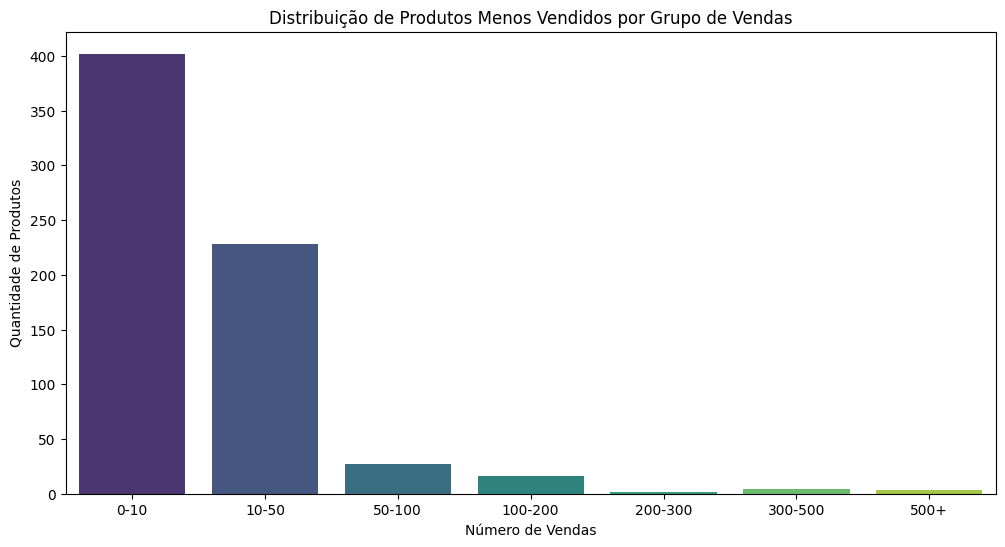

In [225]:
# Criando grupos para a contagem de vendas
bins = [0, 10, 50, 100, 200, 300, 500, float('inf')]
labels = ['0-10', '10-50', '50-100', '100-200', '200-300', '300-500', '500+']

# Adicionando uma nova coluna 'VENDAS_GRUPO' ao DataFrame
df_contagens['VENDAS_GRUPO'] = pd.cut(df_contagens['Contagem'], bins=bins, labels=labels)

# Contando a quantidade de produtos em cada grupo
contagem_vendas_grupo = df_contagens['VENDAS_GRUPO'].value_counts()

# Removendo valores NaN e infinitos
contagem_vendas_grupo = contagem_vendas_grupo.dropna()
contagem_vendas_grupo = contagem_vendas_grupo.replace([np.inf, -np.inf], np.nan).dropna()

# Criando um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_vendas_grupo.index, y=contagem_vendas_grupo.values, palette='viridis')
plt.title('Distribuição de Produtos Menos Vendidos por Grupo de Vendas')
plt.xlabel('Número de Vendas')
plt.ylabel('Quantidade de Produtos')
plt.show()


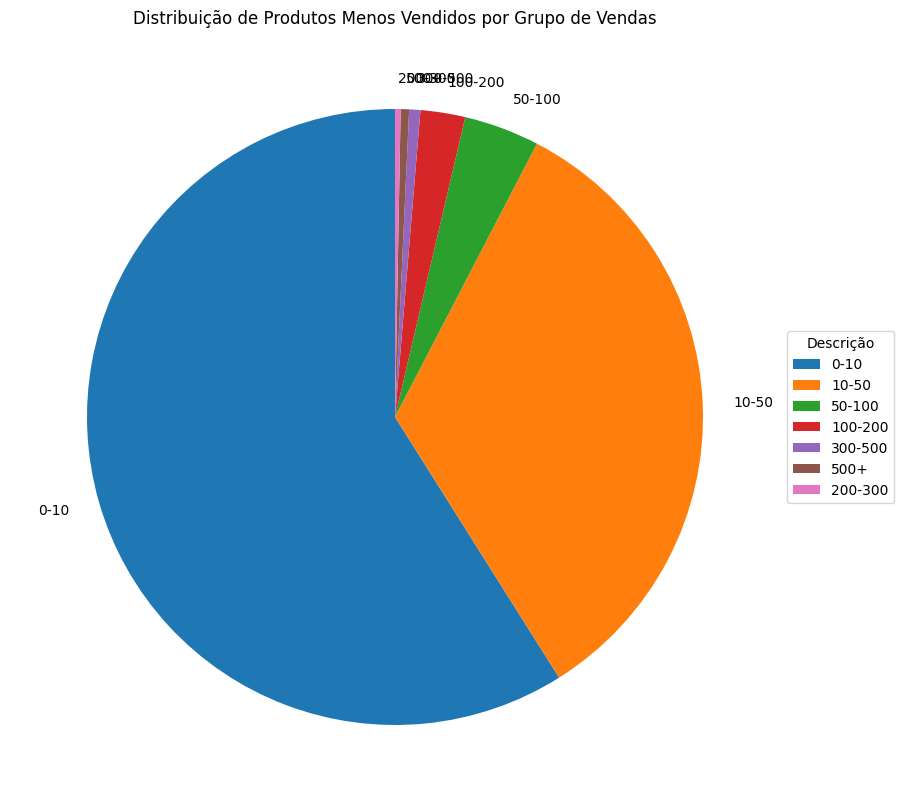

In [226]:
# Criando um gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(contagem_vendas_grupo, labels=contagem_vendas_grupo.index, autopct='', startangle=90)
plt.title('Distribuição de Produtos Menos Vendidos por Grupo de Vendas')
# Adicionar a legenda fora do gráfico
plt.legend(contagem_vendas_grupo.index, title='Descrição', bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()


In [227]:
produtos_mais_vendidos = df['DESCRICAO'].value_counts()
print(produtos_mais_vendidos)


VALE-PRESENTE                                           969
CARREGADOR DE PAREDE SUPER FAST CHARGING 25W            568
CARREGADOR DE VIAGEM ULTRA RÁPIDO - TIPO C              505
PELICULA FILM LISA - TRANSPARENTE UPMAX                 459
FONE USB TIPO-C COM FIO E CONTROLES - PRETO             455
                                                       ... 
PULSEIRA ESPORTIVA COURO GALAXY WATCH ACTIVE - PRETA      1
S9+ HYPERKNIT COVER - VERMELHO                            1
MOCHILA NOTEBOOK 15.6 KROSS CASUAL CINZA                  1
Galaxy Buds2 Pro Branco                                   1
Galaxy Tab S6 Lite 64GB 4G Cinza                          1
Name: DESCRICAO, Length: 682, dtype: int64


In [228]:
df.to_excel('baseTratada.xlsx')
df_contagens.to_excel('baseContagens.xlsx')
